In [4]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import pprint
import json

In [7]:
import requests
headers = {
"x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}
  
characterName = "난싸개다"
urlString = "https://open.api.nexon.com/maplestory/v1/id?character_name=" + characterName
response = requests.get(urlString, headers = headers)
  
print(response.json())

{'ocid': '9fa6b90baf51e7bc8050e7ba137a56f9'}


In [8]:
import requests
headers = {
"x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}
  
characterName = "난싸개다"
urlString = "https://open.api.nexon.com/maplestory/v1/id?character_name=" + characterName
response = requests.get(urlString, headers = headers)
ocid = response.json()['ocid']
  
urlString = "https://open.api.nexon.com/maplestory/v1/character/basic?ocid=9fa6b90baf51e7bc8050e7ba137a56f9&date=2024-07-15"
response = requests.get(urlString, headers = headers)

print(response.json())

{'date': '2024-07-15T00:00+09:00', 'character_name': '난싸개다', 'world_name': '버닝', 'character_gender': '여', 'character_class': '메카닉', 'character_class_level': '5', 'character_level': 248, 'character_exp': 14577541352, 'character_exp_rate': '5.090', 'character_guild_name': None, 'character_image': 'https://open.api.nexon.com/static/maplestory/Character/IMCOKBKANIAFPMCHNHKKKHJCDFBNPOPAFHNIHDMJNJONJCABECBGONIPJCJGHALLFGGAPBOHJIIMKJNFEFNDONCACDNGPEJCLFGIACKGCOLNFECKGDKGCAFMJHMNHINFMNFHNFECDKGJGGEDIEJFJKAEEDIPJMOHDGMIMDJMNCKNNMHMOKDIGNLADJENDFPFBLKIAADDCOCLDLOPACLMMLLNLFPFLFJGDPKJABDFAIFNBKOLDFIJGFACCIBGPNPP.png', 'character_date_create': '2024-06-25T00:00+09:00', 'access_flag': 'true', 'liberation_quest_clear_flag': 'false'}


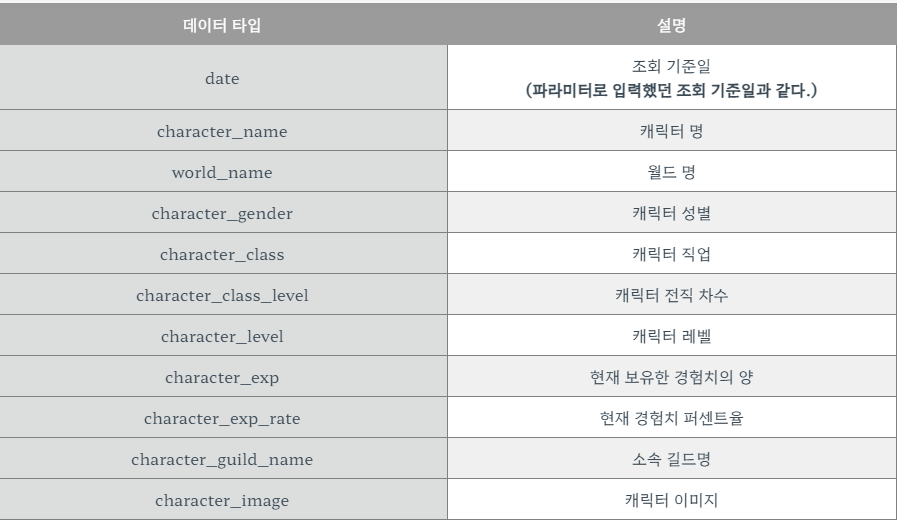


In [14]:
contents = response.text

# 데이터 결과값 예쁘게 출력해주는 코드
pp = pprint.PrettyPrinter(indent=4)
print(pp.pprint(contents))

## json을 DataFrame으로 변환하기 ##

#문자열을 json으로 변경
json_ob = json.loads(contents)
print(type(json_ob)) #json타입 확인

# 필요한 내용만 꺼내기
body = json_ob['response']['body']['items']
print(body)

# pandas import
import pandas as pd

# Dataframe으로 만들기
dataframe = pd.json_normalize(body)

print(dataframe)

'{"date":"2024-07-15T00:00+09:00","character_name":"난싸개다","world_name":"버닝","character_gender":"여","character_class":"메카닉","character_class_level":"5","character_level":248,"character_exp":14577541352,"character_exp_rate":"5.090","character_guild_name":null,"character_image":"https://open.api.nexon.com/static/maplestory/Character/IMCOKBKANIAFPMCHNHKKKHJCDFBNPOPAFHNIHDMJNJONJCABECBGONIPJCJGHALLFGGAPBOHJIIMKJNFEFNDONCACDNGPEJCLFGIACKGCOLNFECKGDKGCAFMJHMNHINFMNFHNFECDKGJGGEDIEJFJKAEEDIPJMOHDGMIMDJMNCKNNMHMOKDIGNLADJENDFPFBLKIAADDCOCLDLOPACLMMLLNLFPFLFJGDPKJABDFAIFNBKOLDFIJGFACCIBGPNPP.png","character_date_create":"2024-06-25T00:00+09:00","access_flag":"true","liberation_quest_clear_flag":"false"}'
None
<class 'dict'>


KeyError: 'response'